# Luca Corsetti 0001131095

Find the best classification scheme for the included dataset.
The solution must be produced as a Python Notebook.
The notebook must include appropriate comments and must operate
as follows:
1. The data are split in two files, load the files and merge them
according to the first column, which is the index; both the files
contain a "class" column, keep both the columns in the merged
file calling them "class_x" and "class_y" (you can use the merge
function of pandas dataframes) (4pt)
2. Delete all the rows where class_x is different from class_y, then
drop class_y and rename class_x as class (4pt)
3. Reorder the columns in alphabetical order, but placing the class
column as the last one; the cleaned dataframe must be named
df; show its size and head (4pt)
4. Find the best classification scheme using three classification
methods
5. For each classification method find the best parameter setting
with cross validation on the training set (6pt)
6. For each classification method compute the accuracy and the
confusion matrix on the test set (4pt)
7. Produce a plot of the accuracies given by the methods
attempted (3pt)

In [26]:
# setup & imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

random_state=777

### 1. The data are split in two files, load the files and merge them according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes) (4pt)

In [2]:
df1 = pd.read_csv('./exam_1.csv', index_col=0)
df1 = df1.rename(columns={'class': 'class_x'})

df1.head()

,A,C,E,class_x
0,-0.386248,1.536628,1.232589,1
1,-2.686649,4.640702,0.823433,1
2,0.474124,1.576616,-1.256234,0
3,-1.343790,-0.514008,1.520392,2
4,-2.187600,0.289041,1.318321,2


In [3]:
df2 = pd.read_csv('./exam_2.csv', index_col=0)
df2 = df2.rename(columns={'class': 'class_y'})

df2.head()

,B,D,F,class_y
0,-1.432057,1.039420,0.280469,1
1,-4.036329,0.526320,-0.419013,1
2,0.179770,0.157974,-0.162869,0
3,-1.299109,-0.152250,0.045123,2
4,-2.089699,-0.494995,-0.661858,2


In [4]:
merged = df1.merge(df2, how='outer', left_index=True, right_index=True)

merged.head()

,A,C,E,class_x,B,D,F,class_y
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469,1
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013,1
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869,0
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123,2
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858,2


### 2. Delete all the rows where class_x is different from class_y, then drop class_y and rename class_x as class (4pt)

In [5]:
cleaned = merged[merged['class_x'] == merged['class_y']]

cleaned = cleaned.drop(columns=['class_y'])
cleaned = cleaned.rename(columns={'class_x': 'class'})

cleaned.head()

,A,C,E,class,B,D,F
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858


### 3. Reorder the columns in alphabetical order, but placing the class column as the last one; the cleaned dataframe must be named df; show its size and head (4pt)

In [6]:
# df = cleaned.reindex(columns=sorted(cleaned.columns))
# df.head()

# equivalent naive python
sorted_cols = sorted(cleaned.columns)
df = pd.DataFrame(columns=sorted_cols)

for col in sorted_cols:
    df[col] = cleaned[col]

df.head()

,A,B,C,D,E,F,class
0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2


In [7]:
df.shape

(1984, 7)

### 4. Find the best classification scheme using three classification methods

Let's divide the dataset into the feature matrix and the class labels. We will these classifiers:
- DecisionTree classifier
- K Nearest Neighbors classifier
- NaiveBayes classifier

We won't pay particular attention to the parameters of the classifiers. We will use the default settings provided by sklearn library.

In [8]:
target = 'class'

y = df[target]
X = df.drop(columns=target)

We then split the data into the training & test slices using a ration of **.7** for the training data since we have a decent amount of it to use ~2000 entries

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=random_state)

print(f"there are {X_train.shape[0]} training samples")
print(f"there are {X_test.shape[0]} test samples")

there are 1388 training samples
there are 596 test samples


#### DecisionTree

In [10]:
dt = DecisionTreeClassifier(random_state=random_state)

dt.fit(X_train, y_train)

y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

y_dt_train_accuracy = accuracy_score(y_train, y_dt_train_pred) * 100
y_dt_test_accuracy = accuracy_score(y_test, y_dt_test_pred) * 100

#### K Nearest Neighbors

In [11]:
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)

y_kn_train_pred = kn.predict(X_train) # we expect 100% accuracy on this one
y_kn_test_pred = kn.predict(X_test)

y_kn_train_accuracy = accuracy_score(y_train, y_kn_train_pred) * 100
y_kn_test_accuracy = accuracy_score(y_test, y_kn_test_pred) * 100

#### Naive Bayes

In [12]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_nb_train_pred = nb.predict(X_train)
y_nb_test_pred = nb.predict(X_test)

y_nb_train_accuracy = accuracy_score(y_train, y_nb_train_pred) * 100
y_nb_test_accuracy = accuracy_score(y_test, y_nb_test_pred) * 100

We can now evaluate which classifier performed best on the data by evaluating its accuracy

In [13]:
cols = ('Classifier', 'Train Accuracy', 'Test Accuracy')
rows = [
    ['Decision Tree', y_dt_train_accuracy, y_dt_test_accuracy],
    ['KNearestNeighbor', y_kn_train_accuracy, y_kn_test_accuracy],
    ['NaiveBayes', y_nb_train_accuracy, y_nb_test_accuracy]
]

results = pd.DataFrame(rows, columns=cols)

results

,Classifier,Train Accuracy,Test Accuracy
0,Decision Tree,100.000000,81.543624
1,KNearestNeighbor,90.129683,86.073826
2,NaiveBayes,80.403458,80.033557


We can see how the KNearestNeighbor perfomed better than the other classifiers having the highest accuracy on the test data

### 5. For each classification method find the best parameter setting with cross validation on the training set (6pt)

Let's prepare for the cross validation laying down some useful structures for the job. We will tune each classifier to obtain the best possible result from each, ultimately evaluating them by the **accuracy and precision** metrics.

In [22]:
scorings = ['accuracy','precision_macro','recall_macro','f1_macro']

models = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=random_state),
        "params": [{"max_depth": list(range(1, dt.get_depth() + 1)), 'class_weight': ['balanced']}]
    },
    "KNearestNeighbor": {
        "model": KNeighborsClassifier(),
        "params": [{"n_neighbors": list(range(1, kn.n_neighbors + 1))}]
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": [{"var_smoothing": [10**exp for exp in range(-1, -13, -1)]}]
    }
}

models

{'Decision Tree': {'model': DecisionTreeClassifier(random_state=777),
  'params': [{'max_depth': [1,
     2,
     3,
     4,
     5,
     6,
     7,
     8,
     9,
     10,
     11,
     12,
     13,
     14,
     15,
     16],
    'class_weight': ['balanced']}]},
 'KNearestNeighbor': {'model': KNeighborsClassifier(),
  'params': [{'n_neighbors': [1, 2, 3, 4, 5]}]},
 'NaiveBayes': {'model': GaussianNB(),
  'params': [{'var_smoothing': [0.1,
     0.01,
     0.001,
     0.0001,
     1e-05,
     1e-06,
     1e-07,
     1e-08,
     1e-09,
     1e-10,
     1e-11,
     1e-12]}]}}

let's now cross validate the classifiers using GridSearchCV.

In [36]:
results = pd.DataFrame(columns=['scoring', 'model', 'best_params', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
classifiers = []

for scoring in scorings:
    for name, settings in models.items():
        print(f"evaluating {name} for {scoring}")
    
        clf = GridSearchCV(settings['model'], settings['params'], cv=5, scoring=scoring)
    
        clf.fit(X_train, y_train)
        classifiers.append(clf)
        
        y_true, y_pred = y_test, clf.predict(X_test)
        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
        results.loc[len(results)] = [scoring,
                                    name,
                                    clf.best_params_,
                                    report['accuracy'],
                                    report['macro avg']['precision'],
                                    report['macro avg']['recall'],
                                    report['macro avg']['f1-score']]

evaluating Decision Tree for accuracy
evaluating KNearestNeighbor for accuracy
evaluating NaiveBayes for accuracy
evaluating Decision Tree for precision_macro


/Users/ilcors-dev/src/unibo/unibo-MLDM/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ilcors-dev/src/unibo/unibo-MLDM/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ilcors-dev/src/unibo/unibo-MLDM/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

evaluating KNearestNeighbor for precision_macro
evaluating NaiveBayes for precision_macro
evaluating Decision Tree for recall_macro
evaluating KNearestNeighbor for recall_macro
evaluating NaiveBayes for recall_macro
evaluating Decision Tree for f1_macro
evaluating KNearestNeighbor for f1_macro
evaluating NaiveBayes for f1_macro


let's sort the results by the 'precision' score in descending order to see which model performed better

In [49]:
precision_score = results.sort_values(by='precision_macro', ascending=False)

precision_score[precision_score['scoring'] == 'precision_macro']

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
4,precision_macro,KNearestNeighbor,{'n_neighbors': 3},0.859060,0.862124,0.859461,0.857984
3,precision_macro,Decision Tree,"{'class_weight': 'balanced', 'max_depth': 9}",0.832215,0.837308,0.832546,0.830306
5,precision_macro,NaiveBayes,{'var_smoothing': 0.01},0.800336,0.801586,0.800281,0.799367


as we can see, once again the KNearestNeighbor clasifier performed better also for the precision score

### 6. For each classification method compute the accuracy and the confusion matrix on the test set (4pt)

since we already computed the accuracy, we can proceed to plot the confusion matrix right away

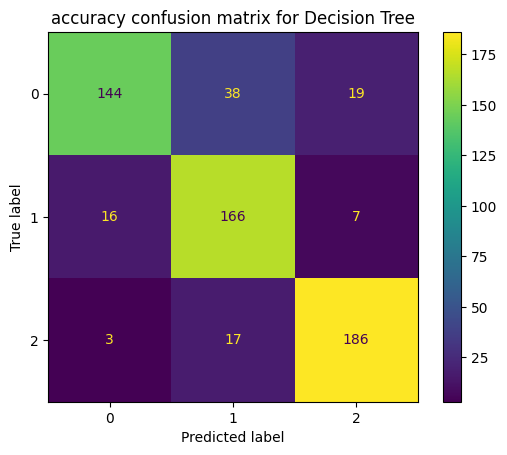

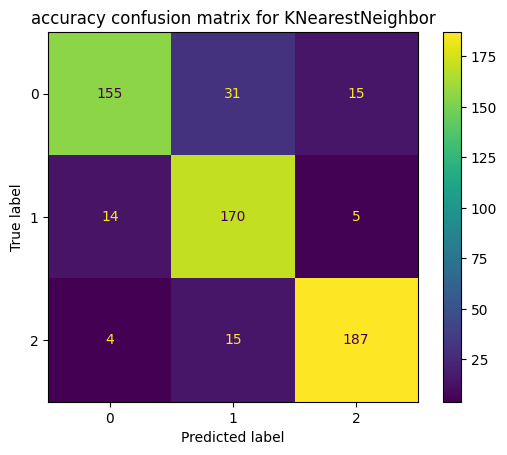

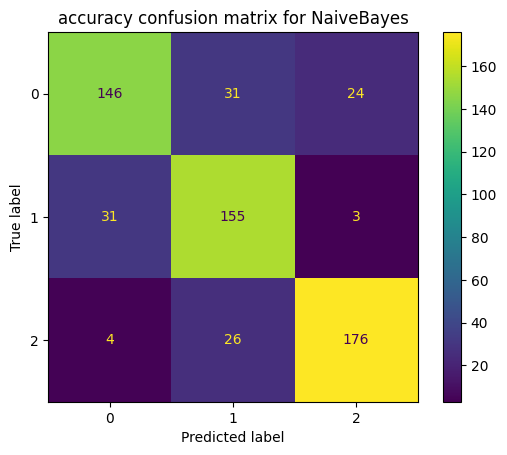

In [54]:
for name in models:
    models_results = results[results['model'] == name]
    best_accuracy_for_model = models_results.loc[results.scoring == 'accuracy', 'accuracy'].idxmax(axis=0)
    fig = ConfusionMatrixDisplay.from_estimator(classifiers[best_accuracy_for_model], X_test, y_test)
    fig.ax_.set_title(f"accuracy confusion matrix for {name}")

### 7. Produce a plot of the accuracies given by the methods attempted (3pt)

<BarContainer object of 3 artists>

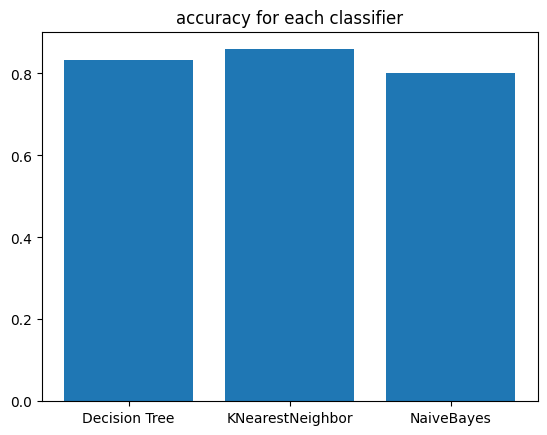

In [58]:
classifiers_list = [name for name in models.keys()]
accuracies = []

for name in models:
    models_results = results[results['model'] == name]
    best_accuracy_for_model = models_results.loc[results.scoring == 'accuracy', 'accuracy'].max(axis=0)
    accuracies.append(best_accuracy_for_model)

plt.title('accuracy for each classifier')
plt.bar(classifiers_list, accuracies)